In [0]:
from google.colab import auth
auth.authenticate_user()

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .../0


Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setting

In [1]:
!mkdir -p my_drive
!google-drive-ocamlfuse my_drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import xgboost as xgb
import numpy
import os
import pandas
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
base = 'my_drive'+os.sep+'ML_Project'+os.sep

In [0]:
p1 = pandas.read_csv(base+"predictions_3.37550.csv")
p2 = pandas.read_csv(base+"predictions_3.43413.csv")

In [0]:
# FIXED RUN IT NOW
def frange(start,stop, step=1.0):
    while start < stop:
        yield start
        start +=step
p3 = []
p4 = []
xaxis =[]
x = frange(0,1,0.1)
for alpha in x:
  xaxis.append(alpha)
  val = (alpha)*p1.Prediction.values + (1-alpha)*p2.Prediction.values
  p3.append(mean_squared_error(p1.Prediction.values,val))
  p4.append(mean_squared_error(p2.Prediction.values,val))

In [0]:
alpha = 0.5
prediction = (alpha)*p1.Prediction.values + (1-alpha)*p2.Prediction.values

In [10]:
prediction

array([0.187138  , 0.28099866, 0.34695449, ..., 0.88472036, 0.2372963 ,
       0.27693006])

In [0]:
alpha = 0.5
prediction = (alpha)*p1.Prediction.values + (1-alpha)*p2.Prediction.values
fh = open(base+'predictions_joint.csv','w')
fh.write('ID,Prediction\n')
for i,yi in enumerate(prediction):
    fh.write('{},{}\n'.format(i,yi))
fh.close()

In [74]:
print(p3)

[0.09087132138274663, 0.09085314802718326, 0.09083497648904638, 0.0908168067683359, 0.09079863886505184, 0.09078047277919422, 0.09076230851076302, 0.09074414605975824, 0.0907259854261799, 0.09070782661002796, 0.09068966961130248, 0.09067151443000344, 0.09065336106613082, 0.09063520951968461, 0.09061705979066483, 0.09059891187907149, 0.09058076578490457, 0.09056262150816409, 0.09054447904885, 0.09052633840696239, 0.09050819958250118, 0.09049006257546639, 0.09047192738585803, 0.09045379401367609, 0.0904356624589206, 0.09041753272159152, 0.09039940480168887, 0.09038127869921267, 0.09036315441416287, 0.0903450319465395, 0.09032691129634259, 0.09030879246357207, 0.090290675448228, 0.09027256025031034, 0.09025444686981914, 0.09023633530675433, 0.09021822556111596, 0.09020011763290402, 0.09018201152211852, 0.09016390722875943, 0.09014580475282677, 0.09012770409432054, 0.09010960525324073, 0.09009150822958736, 0.0900734130233604, 0.09005531963455993, 0.09003722806318581, 0.09001913830923815, 0

In [75]:
print(p4)

[0.0, 9.087132138274297e-10, 3.634852855309718e-09, 8.178418924446812e-09, 1.4539411421238392e-08, 2.2717830345685254e-08, 3.271367569779008e-08, 4.4526947477546904e-08, 5.815764568495878e-08, 7.360577032002512e-08, 9.08713213827466e-08, 1.0995429887312293e-07, 1.3085470279115325e-07, 1.53572533136839e-07, 1.7810778991018013e-07, 2.044604731111755e-07, 2.3263058273983498e-07, 2.626181187961417e-07, 2.944230812801012e-07, 3.2804547019171554e-07, 3.6348528553098656e-07, 4.0074252729791275e-07, 4.398171954924911e-07, 4.807092901147258e-07, 5.234188111646152e-07, 5.679457586421604e-07, 6.142901325473725e-07, 6.624519328802285e-07, 7.124311596407379e-07, 7.642278128289019e-07, 8.178418924447208e-07, 8.73273398488192e-07, 9.30522330959322e-07, 9.89588689858106e-07, 1.050472475184544e-06, 1.1131736869386347e-06, 1.1776923251204044e-06, 1.2440283897298068e-06, 1.3121818807668653e-06, 1.3821527982315783e-06, 1.4539411421239465e-06, 1.527546912443967e-06, 1.6029701091916446e-06, 1.68021073236697

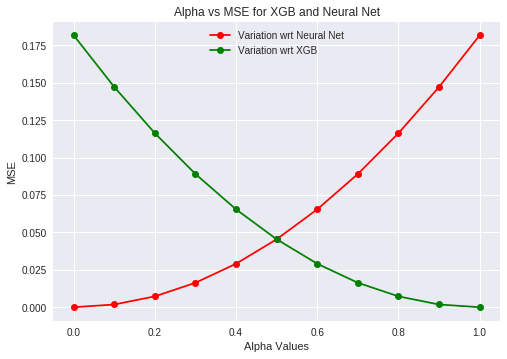

In [7]:
plt.plot(xaxis, p4,'ro-' ,label = 'Variation wrt Neural Net')
plt.plot(xaxis, p3,'go-',label = 'Variation wrt XGB')
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.title('Alpha vs MSE for XGB and Neural Net')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

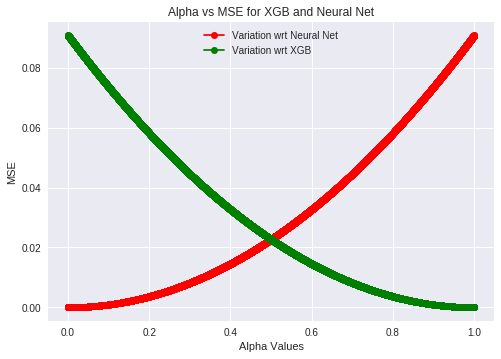

In [76]:
plt.plot(xaxis, p4,'ro-' ,label = 'Variation wrt Neural Net')
plt.plot(xaxis, p3,'go-',label = 'Variation wrt XGB')
plt.xlabel('Alpha Values')
plt.ylabel('MSE')
plt.title('Alpha vs MSE for XGB and Neural Net')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

In [77]:
vals = list(set(p3).intersection(set(p4)))
len(vals)

0

In [0]:
for i,val in enumerate(p3):
  if p3 in vals: print(i)

In [0]:
def boxPlotter(dataToPlot,s):
	import matplotlib as mpl 
	mpl.use('agg')
	import matplotlib.pyplot as plt 
	fig = plt.figure(1, figsize=(9, 6))
	ax = fig.add_subplot(111)
	bp = ax.boxplot(dataToPlot, patch_artist=True)
	ax.set_xticklabels(s)
	for box in bp['boxes']:
		box.set( color='#7570b3', linewidth=2)
		box.set( facecolor = '#1b9e77' )
	for whisker in bp['whiskers']:
		whisker.set(color='#7570b3', linewidth=2)
	for cap in bp['caps']:
		cap.set(color='#7570b3', linewidth=2)
	for median in bp['medians']:
		median.set(color='#b2df8a', linewidth=2)
	for flier in bp['fliers']:
		flier.set(marker='o', color='#e7298a', alpha=0.5)
	fig.show(base+'fig1.png', bbox_inches='tight')	


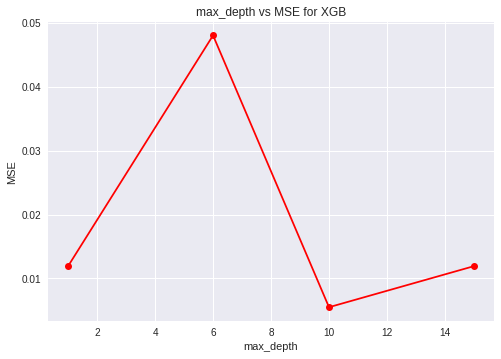

In [114]:
max_depth = [1,6,10,15]
mse = [0.01193666667,0.04806533333,0.005495714286,0.01192666667]
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('max_depth vs MSE for XGB')
plt.plot(max_depth, mse,'ro-')
plt.grid(True)
plt.show()

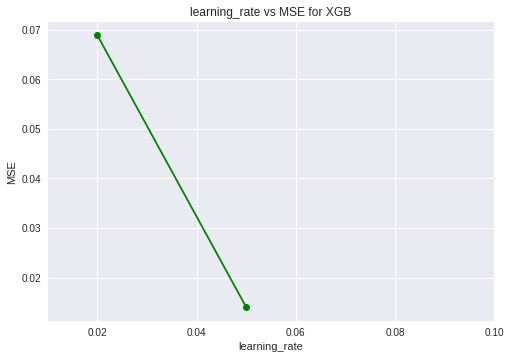

In [115]:
learn = [0.02,0.05]
mse = [0.068825,0.014022]
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('learning_rate vs MSE for XGB')
plt.plot(learn, mse,'go-')
plt.xlim(0.01,0.10)
plt.grid(True)
plt.show()

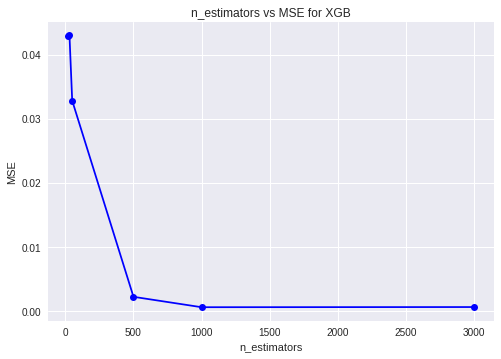

In [116]:
esti = [20, 30, 50, 500, 1000, 3000]
mse = [0.042984, 0.043005, 0.03284, 0.00228, 0.00066, 0.000685]
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('n_estimators vs MSE for XGB')
plt.plot(esti, mse,'bo-')
plt.grid(True)
plt.show()